# NETFLIX

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = os.path.join('data', 'netflix_titles.csv')
df_prod = pd.read_csv(path)

## 1. découverte du dataset production de films par pays et par type

In [2]:
df_prod.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df_prod[df_prod['country'] == 'United States'].count()

show_id         2818
type            2818
title           2818
director        2048
cast            2488
country         2818
date_added      2812
release_year    2818
rating          2818
duration        2815
listed_in       2818
description     2818
dtype: int64

In [97]:
list(df_prod['listed_in'].unique())

['Documentaries',
 'International TV Shows, TV Dramas, TV Mysteries',
 'Crime TV Shows, International TV Shows, TV Action & Adventure',
 'Docuseries, Reality TV',
 'International TV Shows, Romantic TV Shows, TV Comedies',
 'TV Dramas, TV Horror, TV Mysteries',
 'Children & Family Movies',
 'Dramas, Independent Movies, International Movies',
 'British TV Shows, Reality TV',
 'Comedies, Dramas',
 'Crime TV Shows, Docuseries, International TV Shows',
 'Dramas, International Movies',
 'Children & Family Movies, Comedies',
 'British TV Shows, Crime TV Shows, Docuseries',
 'TV Comedies, TV Dramas',
 'Documentaries, International Movies',
 'Crime TV Shows, Spanish-Language TV Shows, TV Dramas',
 'Thrillers',
 'International TV Shows, Spanish-Language TV Shows, TV Action & Adventure',
 'International TV Shows, TV Action & Adventure, TV Dramas',
 'Comedies, International Movies',
 'Comedies, International Movies, Romantic Movies',
 'Docuseries, International TV Shows, Reality TV',
 'Comedies, I

In [5]:
df_prod.director.describe()

count              6173
unique             4528
top       Rajiv Chilaka
freq                 19
Name: director, dtype: object

In [6]:
df_prod.duration.shape

(8807,)

In [7]:
df_prod.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

## 2. Nettoyage de la colonne date (conversion)

In [8]:
# Enlever les date_added null
df_prod[df_prod['date_added'].isnull()].shape
df_prod = df_prod[~df_prod['date_added'].isnull()]
df_prod.shape

(8797, 12)

### date_added conversion Year et Month

In [9]:
df_prod['date_added'] = pd.to_datetime(df_prod['date_added'])
df_prod[np.isinf(df_prod['date_added'])]

df_prod['year_added'] = df_prod['date_added'].dt.year
df_prod['month_added'] = df_prod['date_added'].dt.month

In [320]:
df_prod.loc[df_prod['year_added']==2018, 'show_id'].count()

1649

## 3. apurement de la colonne country

### Explosion du dataframe avec explosion de la colonne country

In [10]:
df_countries = df_prod.copy()
df_countries['country']

0       United States
1        South Africa
2                 NaN
3                 NaN
4               India
            ...      
8802    United States
8803              NaN
8804    United States
8805    United States
8806            India
Name: country, Length: 8797, dtype: object

In [11]:
df_countries['country'] = df_countries['country'].str.split(', ')
df_countries = df_countries.explode('country')
df_countries.shape

(10835, 14)

In [12]:
iteration = df_countries['country'].value_counts()
iteration

United States     3683
India             1046
United Kingdom     803
Canada             445
France             393
                  ... 
Malawi               1
Cambodia,            1
Montenegro           1
Nicaragua            1
Latvia               1
Name: country, Length: 127, dtype: int64

### Creation du dataframe des 10 top countries

In [13]:
top_countries = list(iteration[:10].index)
top_countries

['United States',
 'India',
 'United Kingdom',
 'Canada',
 'France',
 'Japan',
 'Spain',
 'South Korea',
 'Germany',
 'Mexico']

In [14]:
df_top_countries = df_countries[df_countries['country'].isin(top_countries)]
df_top_countries.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9


## 4. analyse des 10 genres produits sur les 10 principaux pays au fil des ans

#### Creation d'un dataframe avec les genres explosés

In [245]:
df_genres = df_top_countries.copy()
df_genres['listed_in'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('listed_in')
df_genres.shape

(16014, 15)

In [247]:
df_genres.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,added-released
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9,0


#### Extraction des 10 plus grands genres

In [17]:
largest_genres = df_genres.groupby('listed_in')['show_id'].count().nlargest(10)
largest_genres

listed_in
Dramas                      2191
International Movies        1885
Comedies                    1378
Action & Adventure           832
Independent Movies           831
Documentaries                820
International TV Shows       770
Children & Family Movies     625
Thrillers                    625
Romantic Movies              468
Name: show_id, dtype: int64

In [18]:
largest_genres.index

Index(['Dramas', 'International Movies', 'Comedies', 'Action & Adventure',
       'Independent Movies', 'Documentaries', 'International TV Shows',
       'Children & Family Movies', 'Thrillers', 'Romantic Movies'],
      dtype='object', name='listed_in')

In [19]:
#df_genres = df_genres[df_genres['listed_in'].isin(largest_genres.index)]
#df_genres.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,2021,9


In [248]:
df_genres = df_genres[df_genres['listed_in'].isin(['Dramas', 'International Movies', 'Comedies', 'Action & Adventure', 'Children & Family Movies', 'Horror Movies'])]
df_genres['listed_in'].unique()

array(['Dramas', 'International Movies', 'Comedies', 'Horror Movies',
       'Action & Adventure', 'Children & Family Movies'], dtype=object)

#### changement de la catégorie Year

In [249]:
df_genres["yr"]=df_genres.year_added.astype('category')
df_genres.yr

7       2021
7       2021
7       2021
7       2021
7       2021
        ... 
8804    2019
8805    2020
8805    2020
8806    2019
8806    2019
Name: yr, Length: 7255, dtype: category
Categories (14, int64): [2008, 2009, 2010, 2011, ..., 2018, 2019, 2020, 2021]

In [250]:
pivot_genres = df_genres.pivot_table(index = 'yr', columns=['listed_in'], values='title', aggfunc='count')
pivot_genres

listed_in,Action & Adventure,Children & Family Movies,Comedies,Dramas,Horror Movies,International Movies
yr,,,,,,
2008,0,0,0,1,0,0
2009,0,0,0,0,1,0
2010,0,0,0,0,1,0
2011,0,3,0,17,0,3
2012,0,1,3,0,0,0
2013,0,2,1,0,0,0
2014,1,6,4,0,0,2
2015,2,12,13,11,2,11
2016,12,23,48,58,8,75


In [251]:
#pivot_genres['Thrillers'].plot()

In [252]:
pivot_genres.columns

Index(['Action & Adventure', 'Children & Family Movies', 'Comedies', 'Dramas',
       'Horror Movies', 'International Movies'],
      dtype='object', name='listed_in')

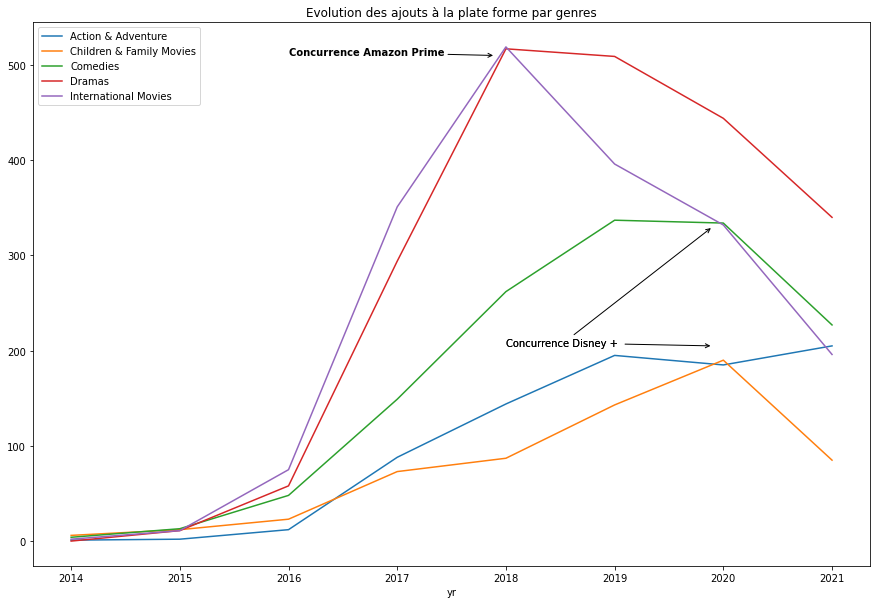

In [221]:
fig,ax = plt.subplots(figsize=(15, 10))
for genre in list(pivot_genres.columns):
    pivot_genres.loc[2014:, genre].plot()
plt.title("Evolution des ajouts à la plate forme par genres")  
ax.annotate("Concurrence Amazon Prime", xy=(3.9, 510), xytext=(2, 510), arrowprops=dict(arrowstyle="->"), fontweight='bold')
ax.annotate("Concurrence Disney + ", xy=(5.9, 205), xytext=(4, 205), arrowprops=dict(arrowstyle="->"))
ax.annotate("Concurrence Disney + ", xy=(5.9, 330), xytext=(4, 205), arrowprops=dict(arrowstyle="->"))

#plt.arrow(4.05, 500, 0.5,-100, head_width = 0.2, width = 0.05,ec ='green' )

plt.legend(loc='upper left')    
plt.show();

Entreprise qui ne cesse d'évoluer pour rester le géant qu'elle est. 

### Revue de la saisonnalité mensuelle

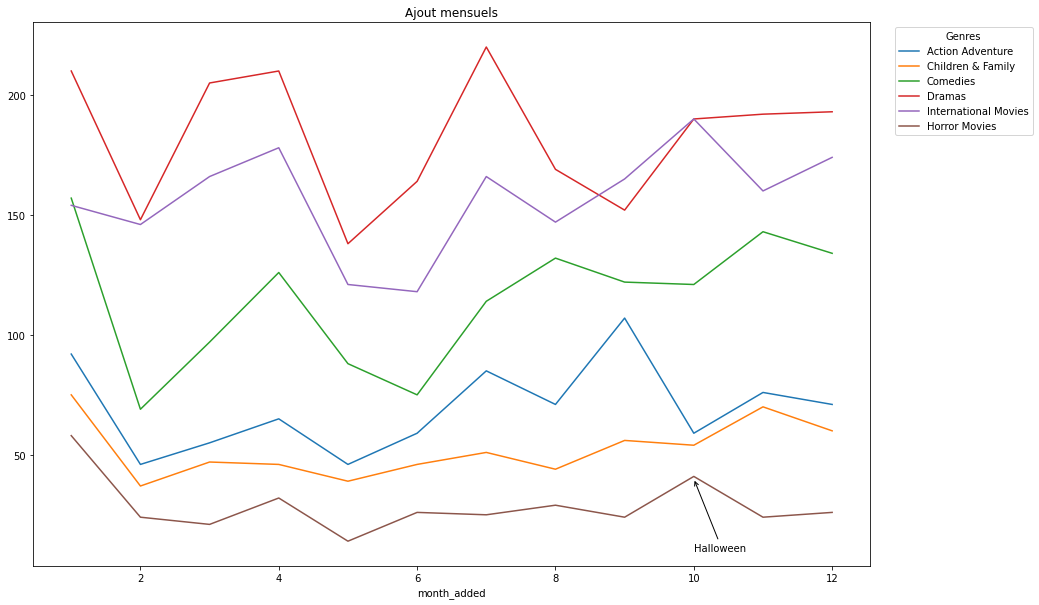

In [265]:
fig,ax = plt.subplots(figsize=(15, 10))

df_genres[df_genres['listed_in']=='Action & Adventure'].groupby('month_added').count()['show_id'].plot(label="Action Adventure")
df_genres[df_genres['listed_in']=='Children & Family Movies'].groupby('month_added').count()['show_id'].plot(label = "Children & Family")
df_genres[df_genres['listed_in']=='Comedies'].groupby('month_added').count()['show_id'].plot(label="Comedies")
df_genres[df_genres['listed_in']=='Dramas'].groupby('month_added').count()['show_id'].plot(label="Dramas")
df_genres[df_genres['listed_in']=='International Movies'].groupby('month_added').count()['show_id'].plot(label="International Movies")
df_genres[df_genres['listed_in']=='Horror Movies'].groupby('month_added').count()['show_id'].plot(label="Horror Movies")

ax.annotate("Halloween ", xy=(10, 40), xytext=(10, 10), arrowprops=dict(arrowstyle="->"))
plt.title("Ajout mensuels")
plt.legend(title='Genres', loc='upper right', bbox_to_anchor=(1.2, 1))

In [95]:
list(df_genres['listed_in'].unique())

['Documentaries',
 'International TV Shows',
 'Dramas',
 'Independent Movies',
 'International Movies',
 'Comedies',
 'Romantic Movies',
 'Thrillers',
 'Action & Adventure',
 'Children & Family Movies']

## 4. Travail sur les productions netflix / année

In [54]:
df_top_countries['added-released'] = df_top_countries['year_added'] - df_top_countries['release_year']
df_top_countries.head(2)

<ipython-input-54-31af8f1f35cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_countries['added-released'] = df_top_countries['year_added'] - df_top_countries['release_year']


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,added-released
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,0


In [55]:
hors_netflix = df_countries[df_countries['added-released']>0].groupby('country')['show_id'].count()
hors_netflix

country
                 1
Afghanistan      1
Algeria          2
Argentina       54
Australia       97
                ..
Vatican City     1
Venezuela        3
Vietnam          4
West Germany     5
Zimbabwe         3
Name: show_id, Length: 112, dtype: int64

In [67]:
produit_netflix = df_top_countries[df_top_countries['added-released']==0].groupby('year_added')['show_id'].count()
produit_netflix

year_added
2009      1
2012      2
2013      7
2014     17
2015     51
2016    178
2017    370
2018    481
2019    544
2020    637
2021    336
Name: show_id, dtype: int64

<AxesSubplot:xlabel='year_added'>

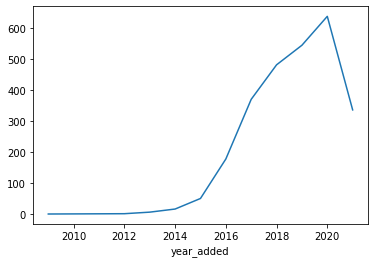

In [71]:
# production netflix
produit_netflix.plot()

In [85]:
produit_netflix = df_top_countries[df_top_countries['added-released']==0].groupby('country')['show_id'].count().sort_values(ascending=False)
produit_netflix

country
United States     1436
United Kingdom     245
India              234
Canada             139
France             108
Japan              106
South Korea         99
Spain               99
Mexico              90
Germany             68
Name: show_id, dtype: int64

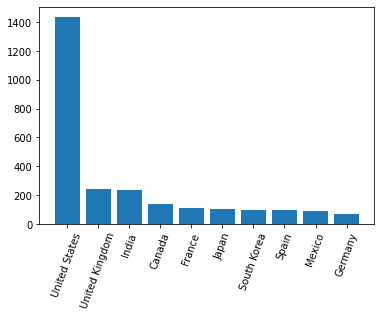

In [86]:
plt.bar(produit_netflix.index, produit_netflix.values)
plt.xticks(rotation=70);

## director

In [318]:
df_dir = df_top_countries.copy()
df_dir['director'] = df_dir['director'].str.split(', ')
df_dir = df_dir.explode('director')
df_dir.groupby('director')['show_id'].count().sort_values(ascending=False)[:20]

director
Steven Spielberg       17
Martin Scorsese        16
Jay Karas              15
Marcus Raboy           15
Jay Chapman            12
Martin Campbell        12
Jan Suter              12
Ron Howard             11
McG                    11
Don Michael Paul       10
Raúl Campos            10
Anurag Kashyap         10
Lasse Hallström        10
Raja Gosnell            9
Robert Luketic          9
Robert Vince            9
Quentin Tarantino       9
Ishi Rudell             9
Alastair Fothergill     9
Justin G. Dyck          9
Name: show_id, dtype: int64

## ACTORS

In [29]:
df_actors = df_top_countries.copy()
df_actors['cast'] = df_actors['cast'].str.split(', ')
df_actors = df_actors.explode('cast')


#### Acteurs de films/séries produits par la France

In [294]:
df_actors_france = df_actors[df_actors['country']=='France']
#df_actors_france = df_actors_france[df_actors_france['type']=='Movie']
#df_actors_france = df_actors_france[df_actors_france['year_added']==2021]
df_actors_france['cast'].value_counts().nlargest(20)

Benoît Magimel          5
Wille Lindberg          5
Gael García Bernal      4
Omar Sy                 4
Kristin Scott Thomas    4
Jesse Richman           4
Gérard Depardieu        4
Matt Annetts            4
Liam Neeson             4
Paul Giamatti           4
Blanche Gardin          4
Brendan Gleeson         4
Patrick d'Assumçao      4
Julia Piaton            4
Eriq Ebouaney           4
Léa Seydoux             4
Bárbara Lennie          3
Paul Schrier            3
Colin Farrell           3
Mélanie Laurent         3
Name: cast, dtype: int64

#### Acteurs de films/sériesproduits par les américains

In [295]:
df_actors_usa = df_actors[df_actors['country']=='United States']
df_actors_usa['cast'].value_counts().nlargest(20)

Tara Strong          22
Samuel L. Jackson    22
Fred Tatasciore      21
Adam Sandler         20
James Franco         19
Nicolas Cage         19
Seth Rogen           18
Morgan Freeman       18
Molly Shannon        17
Erin Fitzgerald      16
Fred Armisen         16
Kate Higgins         15
Alfred Molina        15
Bruce Willis         15
Sean Astin           15
John Travolta        14
Kristen Stewart      14
Michael Peña         14
Laura Bailey         14
Danny Trejo          14
Name: cast, dtype: int64

In [304]:
df_actors_usa = df_actors[df_actors['country']=='United States']
df_actors_usa = df_actors_usa[df_actors_usa['type']=='TV Show']
df_actors_usa['cast'].value_counts().nlargest(5)

Grey Griffin         10
Vincent Tong          8
Tom Kenny             7
Steven Yeun           7
Johnny Yong Bosch     7
Name: cast, dtype: int64

In [306]:
df_actors_usa = df_actors[df_actors['country']=='United States']
#df_actors_usa = df_actors_usa[df_actors_usa['type']=='Movie']
#df_actors_usa = df_actors_usa[df_actors_usa['year_added']==2021]
df_actors_usa['cast'].value_counts().nlargest(20)

Tara Strong          22
Samuel L. Jackson    22
Fred Tatasciore      21
Adam Sandler         20
James Franco         19
Nicolas Cage         19
Seth Rogen           18
Morgan Freeman       18
Molly Shannon        17
Erin Fitzgerald      16
Fred Armisen         16
Kate Higgins         15
Alfred Molina        15
Bruce Willis         15
Sean Astin           15
John Travolta        14
Kristen Stewart      14
Michael Peña         14
Laura Bailey         14
Danny Trejo          14
Name: cast, dtype: int64

In [298]:
df_actors_x = df_actors[df_actors['country']=='United Kingdom']
#df_actors_x = df_actors_x[df_actors_x['type']=='TV Show']
df_actors_x['cast'].value_counts().nlargest(20)

David Attenborough      17
John Cleese             16
Michael Palin           14
Eric Idle               12
Terry Jones             12
Terry Gilliam           11
Graham Chapman          11
Judi Dench               9
Samuel West              9
Helena Bonham Carter     9
Natalie Dormer           8
Eddie Marsan             8
Brendan Gleeson          8
Jim Broadbent            8
Ricky Gervais            8
Olivia Colman            7
Jason Flemyng            7
James Cosmo              7
Teresa Gallagher         7
Johnny Depp              7
Name: cast, dtype: int64

In [307]:
df_actors_x = df_actors[df_actors['country']=='India']
#df_actors_x = df_actors_x[df_actors_x['type']=='TV Show']
df_actors_x['cast'].value_counts().nlargest(20)

Anupam Kher            40
Shah Rukh Khan         34
Naseeruddin Shah       31
Om Puri                29
Akshay Kumar           29
Amitabh Bachchan       28
Paresh Rawal           28
Boman Irani            27
Kareena Kapoor         25
Ajay Devgn             21
Salman Khan            20
Kay Kay Menon          19
Nawazuddin Siddiqui    19
Anil Kapoor            18
Asrani                 17
Saif Ali Khan          17
Yashpal Sharma         17
Gulshan Grover         17
Rajesh Sharma          17
Rajpal Yadav           17
Name: cast, dtype: int64

## Exploitation des titres / descriptions

### TITRES

In [35]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
text = " ".join(i for i in df_prod.title)
text

'Dick Johnson Is Dead Blood & Water Ganglands Jailbirds New Orleans Kota Factory Midnight Mass My Little Pony: A New Generation Sankofa The Great British Baking Show The Starling Vendetta: Truth, Lies and The Mafia Bangkok Breaking Je Suis Karl Confessions of an Invisible Girl Crime Stories: India Detectives Dear White People Europe\'s Most Dangerous Man: Otto Skorzeny in Spain Falsa identidad Intrusion Jaguar Monsters Inside: The 24 Faces of Billy Milligan Resurrection: Ertugrul Avvai Shanmughi Go! Go! Cory Carson: Chrissy Takes the Wheel Jeans Love on the Spectrum Minsara Kanavu Grown Ups Dark Skies Paranoia Ankahi Kahaniya Chicago Party Aunt Sex Education Squid Game Tayo and Little Wizards The Father Who Moves Mountains The Stronghold Angry Birds Birth of the Dragon Chhota Bheem He-Man and the Masters of the Universe Jaws Jaws 2 Jaws 3 Jaws: The Revenge My Heroes Were Cowboys Safe House The Smart Money Woman Training Day Castle and Castle Dharmakshetra InuYasha the Movie 2: The Cast

In [37]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

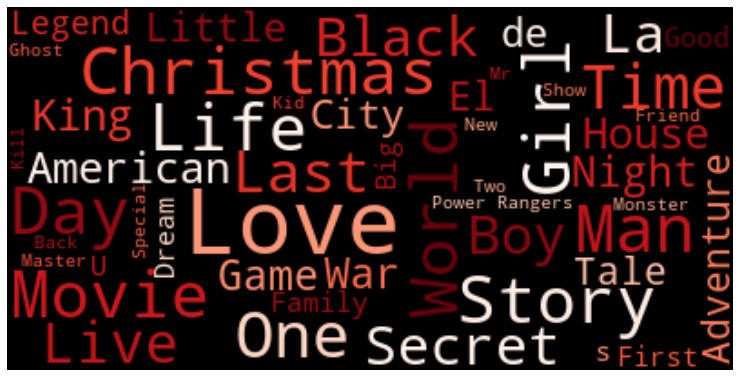

In [154]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black", colormap='Reds_r').generate(text)

#wordcloud = WordCloud().generate(text)

# Display the generated image:
fig = plt.figure(figsize=(13, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### DESCRIPTIONS + titles

In [155]:
desc = " ".join(i for i in df_prod.description) + text


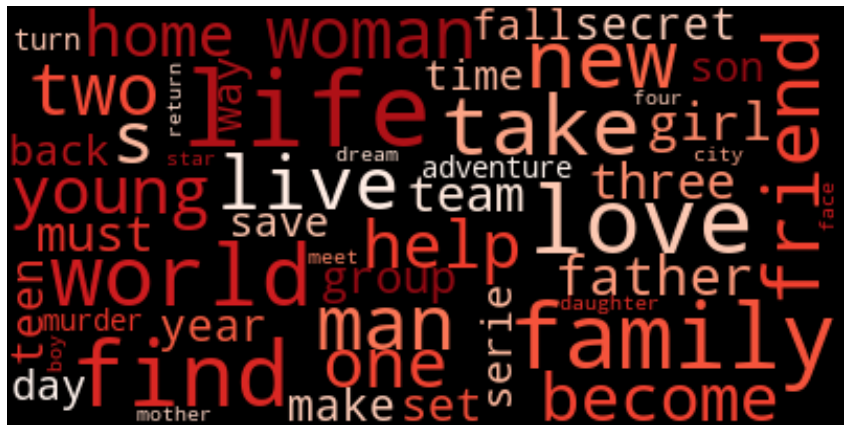

In [156]:
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black", colormap='Reds_r').generate(desc)

#wordcloud = WordCloud().generate(text)

# Display the generated image:
fig = plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'